# CIS 472 Final Project Demo

Collaborators:
* Joseph Goh
* Donna Hooshmand

## Introduction

This is a demo of the image classification algorithms implemented for our final project in CIS 472 Machine Learning at the University of Oregon.
The algorithms are convolutional neural nets applied to images from the SIIM-ISIC Melanoma Classification Contest.
The specific files consist of around 33 thousand `jpg` files that have been cropped in to 256x256 max squares.
Because the provided 'test' set does not include correct labels (as that would defeat the purpose of the contest),
in order to evaluate our performance, we take pseudo-random subsets from the 'train' set to use as our actual training and testing sets.
(The subsets can be regenerated by changing the numpy seed when calling `load_images`.)

Two algorithms have been implemented: AlexNet and EfficientNet.

## Setting up the datasets

In [1]:
# Import statements for the entire notebook

import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from load_images import load_images
import models
from train_and_eval import Arguments, train_and_eval

In [2]:
DATA_DIR = "./data"  # Change this as necessary

torch.manual_seed(472)  # Comment out or change to randomize results

# Create DataLoader objects (change batch_size as necessary for system)
# Change or remove seed argument to get new subsets
train_loader, test_loader = load_images("./data", batch_size=16, split=0.8, portion=1, seed=472)

DataLoader objects created!


## Performing the training

### AlexNet

In [3]:
alex_args = Arguments(
    dropout=0.5,  # The dropout rate for any such layers
    model_type=models.AlexNet,  # The algorithm (it's AlexNet here)
    num_epochs=16,  # Number of total epochs to run for
    lr=0.00001,  # Learning rate
    wd=0.000001  # Weight decay to be passed to Adam optimizer
)
alexnet_df = train_and_eval(train_loader, test_loader, alex_args)

Epoch 0, Train=0.9576, Test=0.9817
Epoch 1, Train=0.9826, Test=0.9817
Epoch 2, Train=0.9829, Test=0.9815
Epoch 3, Train=0.9828, Test=0.9818
Epoch 4, Train=0.9828, Test=0.9821
Epoch 5, Train=0.9828, Test=0.9821
Epoch 6, Train=0.9826, Test=0.9814
Epoch 7, Train=0.9829, Test=0.9814
Epoch 8, Train=0.9831, Test=0.9815
Epoch 9, Train=0.9831, Test=0.9822
Epoch 10, Train=0.9831, Test=0.9818
Epoch 11, Train=0.9823, Test=0.9822
Epoch 12, Train=0.9823, Test=0.9821
Epoch 13, Train=0.9831, Test=0.9819
Epoch 14, Train=0.9828, Test=0.9818
Epoch 15, Train=0.9831, Test=0.9822


### EfficientNetB0

In [4]:
efficient_args = Arguments(
    dropout=0.5,  # The dropout rate for any adjustable dropout layers
    model_type=models.EfficientNetB0,  # The algorithm (it's AlexNet here)
    num_epochs=16,  # Number of total epochs to run for
    lr=0.00001,  # Learning rate
    wd=0.000001  # Weight decay to be passed to Adam optimizer
)
efficientnet_df = train_and_eval(train_loader, test_loader, efficient_args)

Epoch 0, Train=0.7220, Test=0.9447
Epoch 1, Train=0.9316, Test=0.9410
Epoch 2, Train=0.9820, Test=0.9605
Epoch 3, Train=0.9826, Test=0.9823
Epoch 4, Train=0.9826, Test=0.9823
Epoch 5, Train=0.9826, Test=0.9823
Epoch 6, Train=0.9826, Test=0.9823
Epoch 7, Train=0.9826, Test=0.9823
Epoch 8, Train=0.9826, Test=0.9823
Epoch 9, Train=0.9826, Test=0.9823
Epoch 10, Train=0.9826, Test=0.9823
Epoch 11, Train=0.9826, Test=0.9823
Epoch 12, Train=0.9826, Test=0.9823
Epoch 13, Train=0.9826, Test=0.9823
Epoch 14, Train=0.9826, Test=0.9823
Epoch 15, Train=0.9826, Test=0.9823


## Examining the results

### Visualizations

In [5]:
# Plot the model loss over time in a graph
def plot_loss(eval_df: pd.DataFrame):
    plt.figure(figsize=(8,6))
    plt.axes(xlabel='Epochs', ylabel='Cross Entropy Loss')
    plt.title('Model Loss Over Time', loc='center')
    plt.xticks(ticks=eval_df['epoch'])
    plt.grid(b=True)

    plt.plot(eval_df['epoch'], eval_df['train_loss'])
    plt.plot(eval_df['epoch'], eval_df['test_loss'])
    plt.legend(['Training set loss', 'Test set loss'])

    plt.show()

# Plot the model accuracy over time in a graph
def plot_accuracy(eval_df: pd.DataFrame):
    plt.figure(figsize=(8,6))
    plt.axes(xlabel='Epochs', ylabel='Accuracy')
    plt.title('Model Accuracy Over Time', loc='center')
    plt.xticks(ticks=eval_df['epoch'][::5])
    plt.grid(b=True)

    plt.plot(eval_df['epoch'], eval_df['train_acc'])
    plt.plot(eval_df['epoch'], eval_df['test_acc'])
    plt.legend(['Training set accuracy', 'Test set accuracy'])

    plt.show()

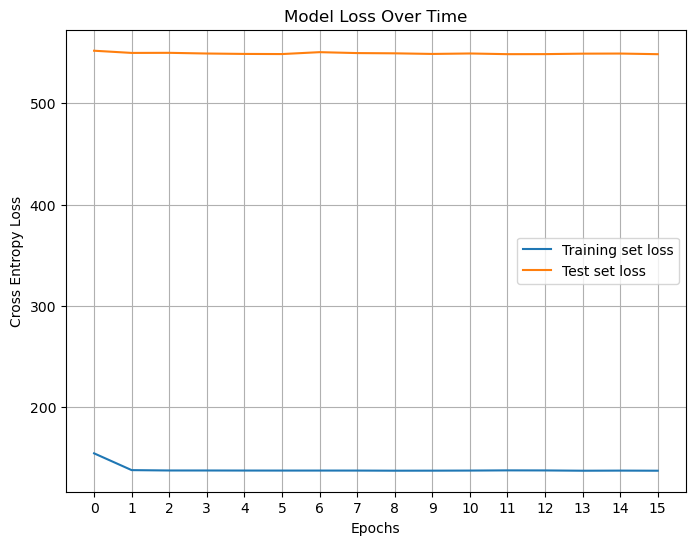

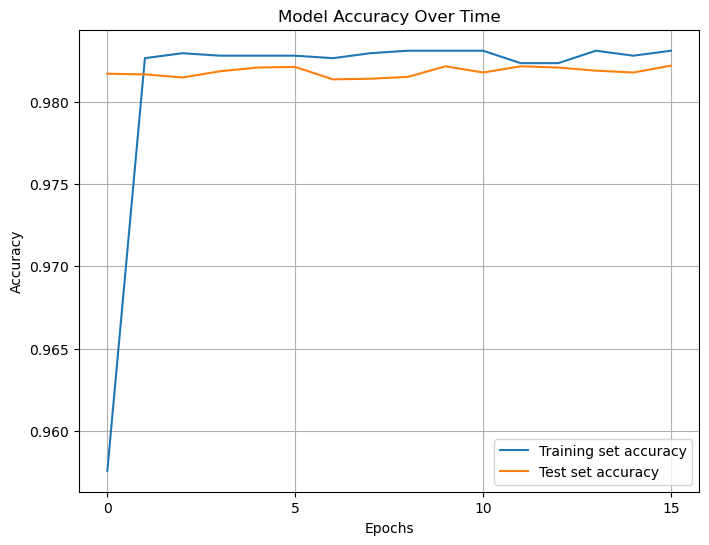

In [6]:
plot_loss(alexnet_df)
print()
plot_accuracy(alexnet_df)

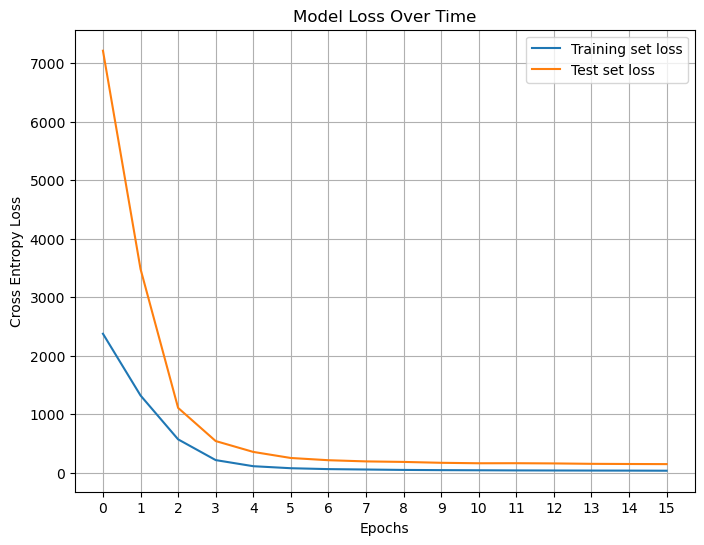

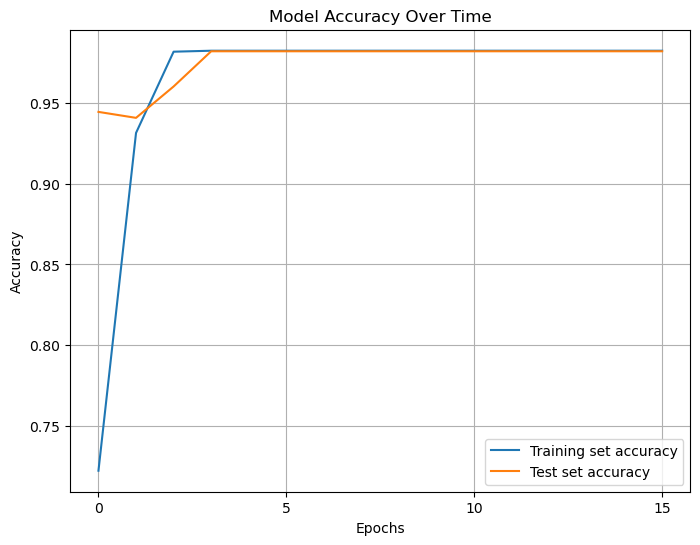

In [7]:
plot_loss(efficientnet_df)
print()
plot_accuracy(efficientnet_df)

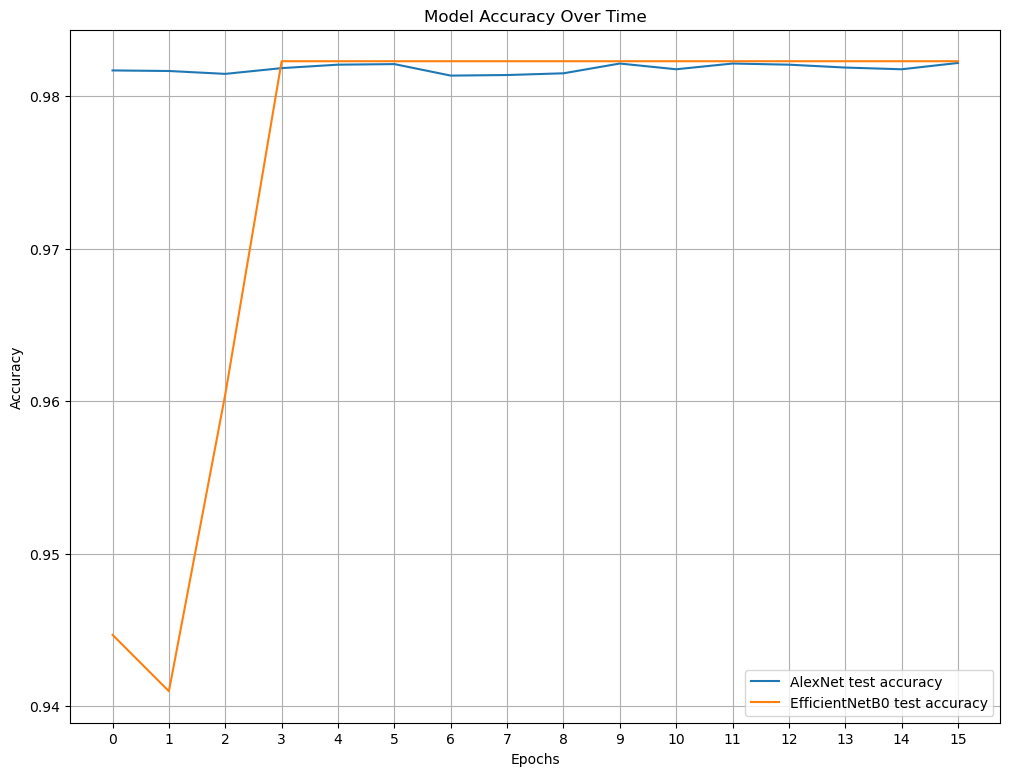

In [9]:
plt.figure(figsize=(12,9))
plt.axes(xlabel='Epochs', ylabel='Accuracy')
plt.title('Model Accuracy Over Time', loc='center')
plt.xticks(ticks=alexnet_df['epoch'])
plt.grid(b=True)

plt.plot(alexnet_df['epoch'], alexnet_df['test_acc'])
plt.plot(efficientnet_df['epoch'], efficientnet_df['test_acc'])
plt.legend(['AlexNet test accuracy', 'EfficientNetB0 test accuracy'])

plt.show()
